# Estatística Espacial

## Medidas de Tendência Central

### Centro Médio

In [ ]:
%matplotlib inline
import os
import conda
os.environ['USE_PYGEOS'] = '0'
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [61]:
import geopandas as gpd
from shapely import Point

imoveis = gpd.read_file("../dados/imoveis_bh.shp")
limite = gpd.read_file("../dados/LIMITE_MUNICIPIO.shp")
limite.to_crs(crs=4326, inplace=True)
imoveis_bh = gpd.clip(imoveis, limite)

<Axes: >

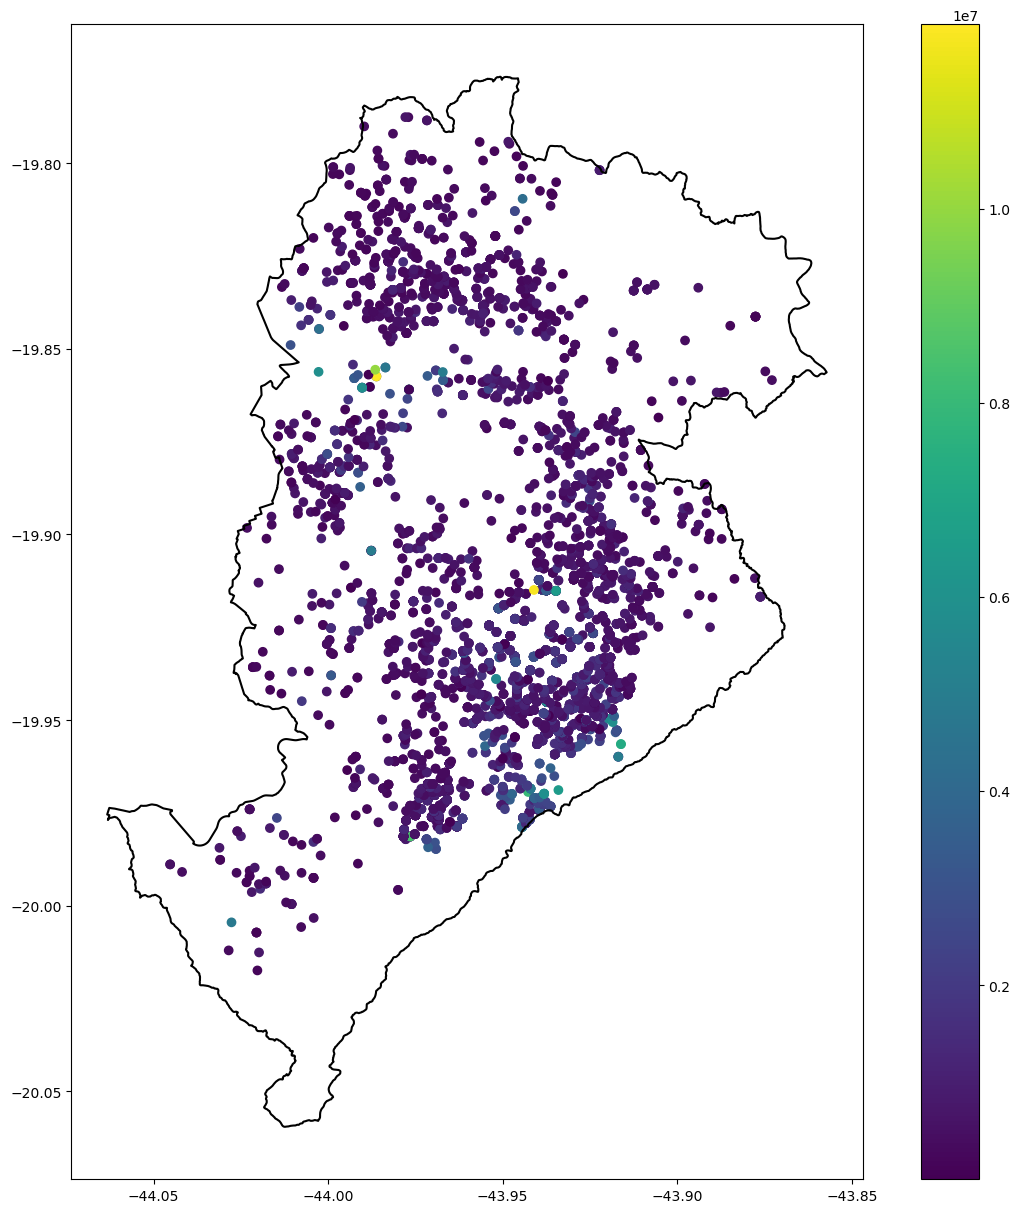

In [89]:
basemap = limite.boundary.plot(color='k', figsize=(15, 15))
imoveis_bh.plot(ax=basemap, column = "price", legend=True )

In [47]:
cm_x = imoveis["geometry"].x.mean()
cm_y = imoveis["geometry"].y.mean()
cm = Point(cm_x,cm_y)

In [48]:
cm = Point(cm_x,cm_y)

In [76]:
d = {'nome': ['Centro Médio'], 'geometry': [cm]}
centro_medio = gpd.GeoDataFrame(d, crs="EPSG:4326")

<Axes: >

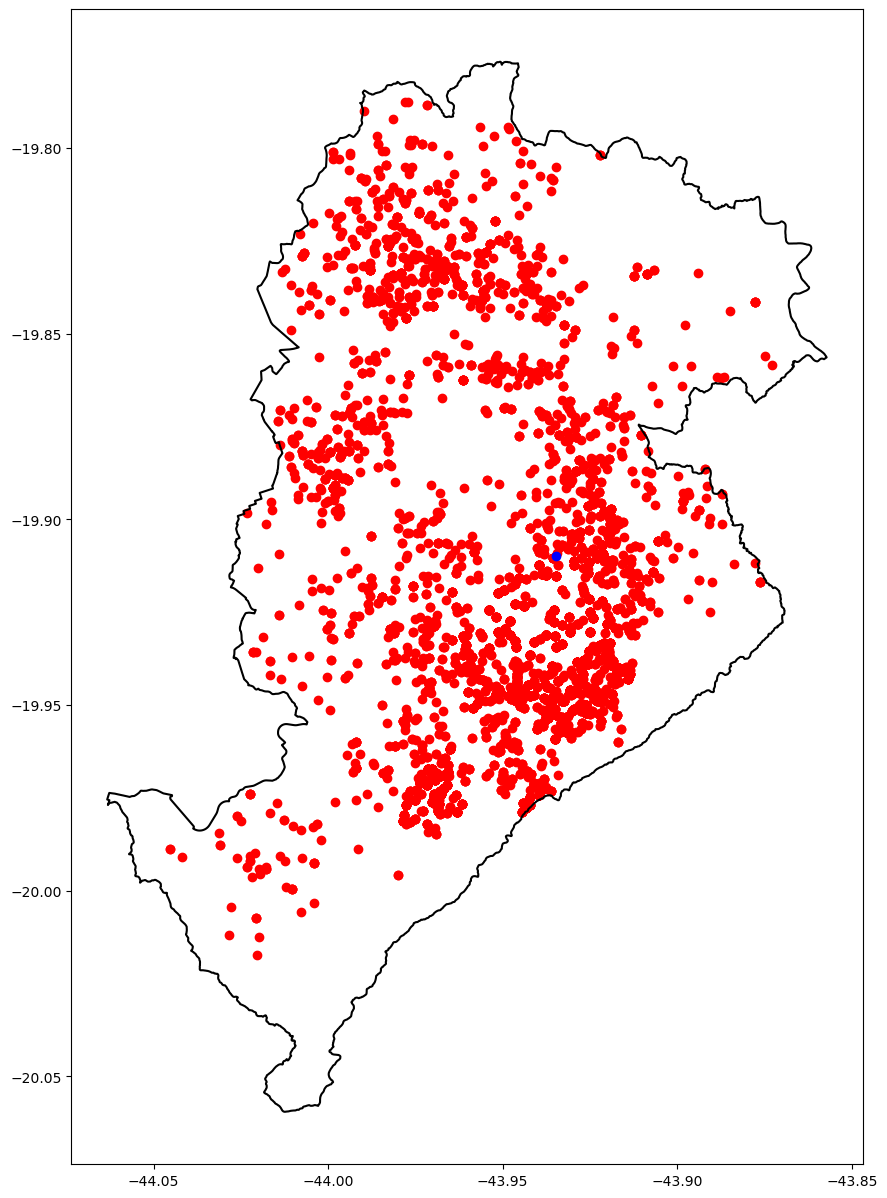

In [77]:
basemap = limite.boundary.plot(color='k', figsize=(15, 15))
imoveis_bh.plot(ax=basemap, color='red' )
centro_medio.plot(ax=basemap, color='blue')

### Centro Médio Ponderado

In [73]:
import numpy as np
cmp_x = np.average(imoveis["geometry"].x.tolist(),weights=imoveis["price"].tolist())
cmp_y = np.average(imoveis["geometry"].y.tolist(),weights=imoveis["price"].tolist())
cmp = Point(cmp_x,cmp_y)

<Axes: >

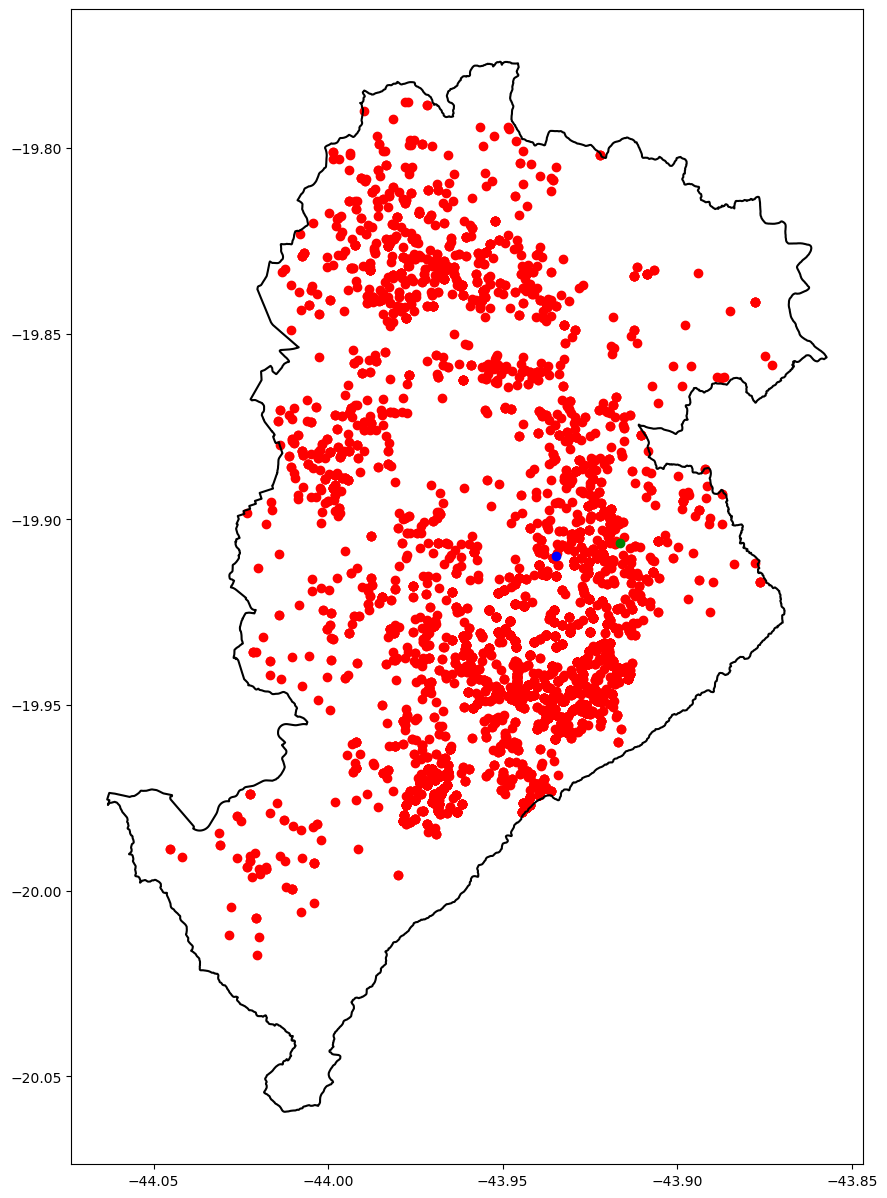

In [84]:
d = {'nome': ['Centro Médio Ponderado'], 'geometry': [cmp]}
centro_medio_p = gpd.GeoDataFrame(d, crs="EPSG:4326")
basemap = limite.boundary.plot(color='k', figsize=(15, 15))
imoveis_bh.plot(ax=basemap, color='red' )
centro_medio.plot(ax=basemap, color='blue')
centro_medio_p.plot(ax=basemap, color='green')

### Centro Mediano

In [86]:
cm_x = centro_saude["geometry"].x.median()
cm_y = centro_saude["geometry"].y.median()
cmd = Point(cm_x,cm_y)


<Axes: >

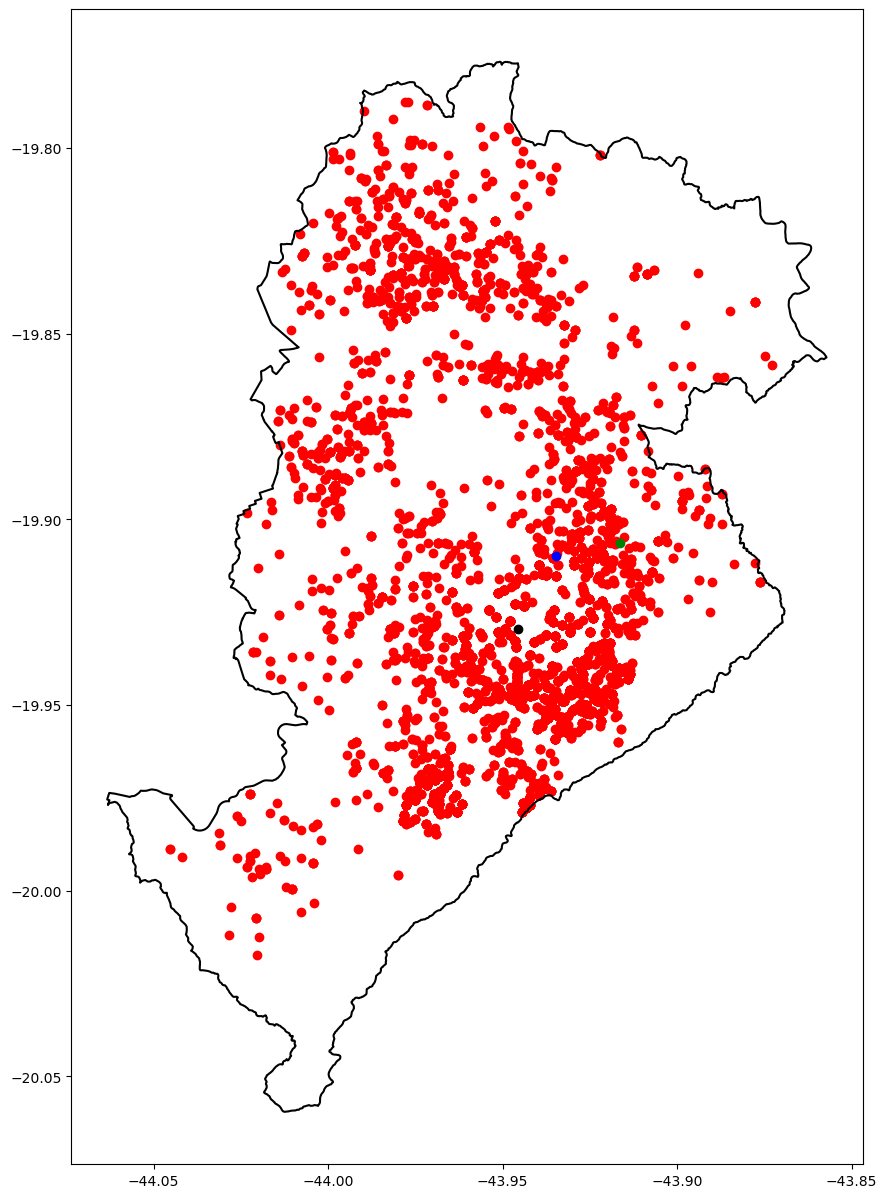

In [87]:
d = {'nome': ['Centro Mediano'], 'geometry': [cmd]}
centro_mediano = gpd.GeoDataFrame(d, crs="EPSG:4326")
basemap = limite.boundary.plot(color='k', figsize=(15, 15))
imoveis_bh.plot(ax=basemap, color='red' )
centro_medio.plot(ax=basemap, color='blue')
centro_medio_p.plot(ax=basemap, color='green')
centro_mediano.plot(ax=basemap, color='black')

## Medidas de Dispersão

### Distância Padrão

### Distância Pdrão Ponderada

### Distância Relativa